# Lending Club Case Study

In [1]:
# importing requiered libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format='{:,.2f}'.format

In [2]:
# importing the loan.csv file
spreadsheet = pd.read_csv('./loan.csv', low_memory=False)

In [3]:
spreadsheet.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


---------

## Cleaning the given data set

1. Removing all the unwanted columns and columns of which data would not be availabe at the time of loan aproval

In [4]:
data = spreadsheet.loc[:, ["loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade", "emp_length","home_ownership","annual_inc","verification_status","loan_status","dti", "purpose","issue_d"]]
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,purpose,issue_d
0,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,10+ years,RENT,"24,000.00",Verified,Fully Paid,27.65,credit_card,Dec-11
1,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,< 1 year,RENT,"30,000.00",Source Verified,Charged Off,1.00,car,Dec-11
2,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,10+ years,RENT,"12,252.00",Not Verified,Fully Paid,8.72,small_business,Dec-11
3,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,10+ years,RENT,"49,200.00",Source Verified,Fully Paid,20.00,other,Dec-11
4,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,1 year,RENT,"80,000.00",Source Verified,Current,17.94,other,Dec-11


---------

2. cleaning some obvious column data like:<br>
    -  removing **months** from **term**
    -  removing **%** from **int_rate**


In [5]:
data.term = data.term.apply(lambda x: x.rstrip(' months'))
data.int_rate = data.int_rate.apply(lambda x: x.rstrip('%')).astype(float)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,purpose,issue_d
0,5000,5000,"4,975.00",36,10.65,162.87,B,B2,10+ years,RENT,"24,000.00",Verified,Fully Paid,27.65,credit_card,Dec-11
1,2500,2500,"2,500.00",60,15.27,59.83,C,C4,< 1 year,RENT,"30,000.00",Source Verified,Charged Off,1.00,car,Dec-11
2,2400,2400,"2,400.00",36,15.96,84.33,C,C5,10+ years,RENT,"12,252.00",Not Verified,Fully Paid,8.72,small_business,Dec-11
3,10000,10000,"10,000.00",36,13.49,339.31,C,C1,10+ years,RENT,"49,200.00",Source Verified,Fully Paid,20.00,other,Dec-11
4,3000,3000,"3,000.00",60,12.69,67.79,B,B5,1 year,RENT,"80,000.00",Source Verified,Current,17.94,other,Dec-11


-----------

3. Renaming the changed columns:<br>
    -  from __term__ to __term_in_months__
    -  from __int_rate__ to **int_rate_in_%**

In [6]:
data.rename(columns={'term': 'term_in_months'}, inplace=True)
data.rename(columns={'int_rate': 'int_rate_in_%'}, inplace=True)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate_in_%,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,purpose,issue_d
0,5000,5000,"4,975.00",36,10.65,162.87,B,B2,10+ years,RENT,"24,000.00",Verified,Fully Paid,27.65,credit_card,Dec-11
1,2500,2500,"2,500.00",60,15.27,59.83,C,C4,< 1 year,RENT,"30,000.00",Source Verified,Charged Off,1.00,car,Dec-11
2,2400,2400,"2,400.00",36,15.96,84.33,C,C5,10+ years,RENT,"12,252.00",Not Verified,Fully Paid,8.72,small_business,Dec-11
3,10000,10000,"10,000.00",36,13.49,339.31,C,C1,10+ years,RENT,"49,200.00",Source Verified,Fully Paid,20.00,other,Dec-11
4,3000,3000,"3,000.00",60,12.69,67.79,B,B5,1 year,RENT,"80,000.00",Source Verified,Current,17.94,other,Dec-11


In [7]:
months = {'Jan': 1, 'Feb': 2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

In [8]:
data["issue_month"] = data.issue_d.apply(lambda x: months[x.split('-')[0]])
data["issue_year"] = data.issue_d.apply(lambda x: '20' + x.split('-')[1])
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate_in_%,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,purpose,issue_d,issue_month,issue_year
0,5000,5000,"4,975.00",36,10.65,162.87,B,B2,10+ years,RENT,"24,000.00",Verified,Fully Paid,27.65,credit_card,Dec-11,12,2011
1,2500,2500,"2,500.00",60,15.27,59.83,C,C4,< 1 year,RENT,"30,000.00",Source Verified,Charged Off,1.00,car,Dec-11,12,2011
2,2400,2400,"2,400.00",36,15.96,84.33,C,C5,10+ years,RENT,"12,252.00",Not Verified,Fully Paid,8.72,small_business,Dec-11,12,2011
3,10000,10000,"10,000.00",36,13.49,339.31,C,C1,10+ years,RENT,"49,200.00",Source Verified,Fully Paid,20.00,other,Dec-11,12,2011
4,3000,3000,"3,000.00",60,12.69,67.79,B,B5,1 year,RENT,"80,000.00",Source Verified,Current,17.94,other,Dec-11,12,2011


----------------

4. Filling in missing values

    -  Assuming **< 1 year** emp_length at **0.5**
    -  Assuming **10+ years** emp_length at **10.5**
    -  Assuming **NaN** in emp_length as mean value of the column emp_length

In [9]:

data["emp_length"] = data.emp_length.apply(lambda x: x.rstrip(' years') if 'years' in str(x) else x)
data["emp_length"] = data.emp_length.apply(lambda x: 0.5 if '< 1' in str(x)  else x)
data["emp_length"] = data.emp_length.apply(lambda x: 10.5 if '10+' in str(x)  else x)
data["emp_length"] = data.emp_length.apply(lambda x: 1 if '1 year' in str(x) else x)
data['emp_length'] = data['emp_length'].astype(float)
data["emp_length"] = data.emp_length.fillna(data['emp_length'].astype(float).mode())

# data.emp_length.mode()
data.head()



,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate_in_%,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,purpose,issue_d,issue_month,issue_year
0,5000,5000,"4,975.00",36,10.65,162.87,B,B2,10.50,RENT,"24,000.00",Verified,Fully Paid,27.65,credit_card,Dec-11,12,2011
1,2500,2500,"2,500.00",60,15.27,59.83,C,C4,0.50,RENT,"30,000.00",Source Verified,Charged Off,1.00,car,Dec-11,12,2011
2,2400,2400,"2,400.00",36,15.96,84.33,C,C5,10.50,RENT,"12,252.00",Not Verified,Fully Paid,8.72,small_business,Dec-11,12,2011
3,10000,10000,"10,000.00",36,13.49,339.31,C,C1,10.50,RENT,"49,200.00",Source Verified,Fully Paid,20.00,other,Dec-11,12,2011
4,3000,3000,"3,000.00",60,12.69,67.79,B,B5,1.00,RENT,"80,000.00",Source Verified,Current,17.94,other,Dec-11,12,2011


----------------

5. Removing the data of all users who have not completed the loan payment (loan status = 'Current)

In [10]:
loan_data = data[(data.loan_status != 'Current')]
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate_in_%,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,purpose,issue_d,issue_month,issue_year
0,5000,5000,"4,975.00",36,10.65,162.87,B,B2,10.50,RENT,"24,000.00",Verified,Fully Paid,27.65,credit_card,Dec-11,12,2011
1,2500,2500,"2,500.00",60,15.27,59.83,C,C4,0.50,RENT,"30,000.00",Source Verified,Charged Off,1.00,car,Dec-11,12,2011
2,2400,2400,"2,400.00",36,15.96,84.33,C,C5,10.50,RENT,"12,252.00",Not Verified,Fully Paid,8.72,small_business,Dec-11,12,2011
3,10000,10000,"10,000.00",36,13.49,339.31,C,C1,10.50,RENT,"49,200.00",Source Verified,Fully Paid,20.00,other,Dec-11,12,2011
5,5000,5000,"5,000.00",36,7.90,156.46,A,A4,3.00,RENT,"36,000.00",Source Verified,Fully Paid,11.20,wedding,Dec-11,12,2011


## Checking Data for outliers 

> Starting by describing the data present in the data set provided

In [11]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_in_%,installment,emp_length,annual_inc,dti,issue_month
count,"38,577.00","38,577.00","38,577.00","38,577.00","38,577.00","37,544.00","38,577.00","38,577.00","38,577.00"
mean,"11,047.03","10,784.06","10,222.48",11.93,322.47,5.11,"68,777.97",13.27,7.11
std,"7,348.44","7,090.31","7,022.72",3.69,208.64,3.64,"64,218.68",6.67,3.41
min,500.00,500.00,0.00,5.42,15.69,0.50,"4,000.00",0.00,1.00
25%,"5,300.00","5,200.00","5,000.00",8.94,165.74,2.00,"40,000.00",8.13,4.00
50%,"9,600.00","9,550.00","8,733.44",11.71,277.86,4.00,"58,868.00",13.37,7.00
75%,"15,000.00","15,000.00","14,000.00",14.38,425.55,9.00,"82,000.00",18.56,10.00
max,"35,000.00","35,000.00","35,000.00",24.40,"1,305.19",10.50,"6,000,000.00",29.99,12.00


In [12]:
# Function to plot a box plot graph 
def box_plot(df, ft):
    df.boxplot(ft)
    plt.grid(False)
    plt.show()

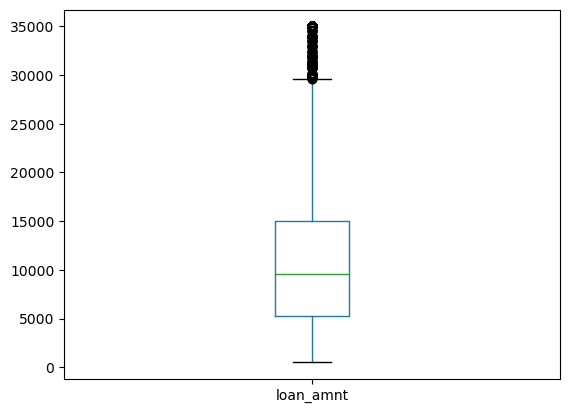

In [13]:
# Box plot of loan amout data
box_plot(loan_data, "loan_amnt")

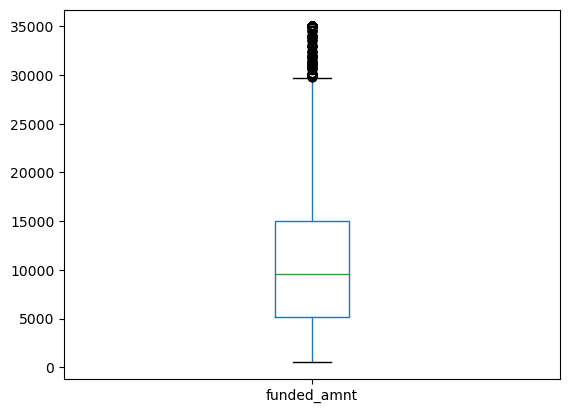

In [14]:
# Box plot of funded amount data
box_plot(loan_data, "funded_amnt")

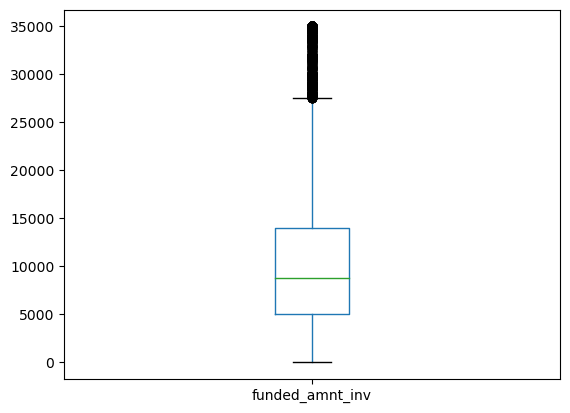

In [15]:
# Box plot of funded amout given by invester
box_plot(loan_data, "funded_amnt_inv")

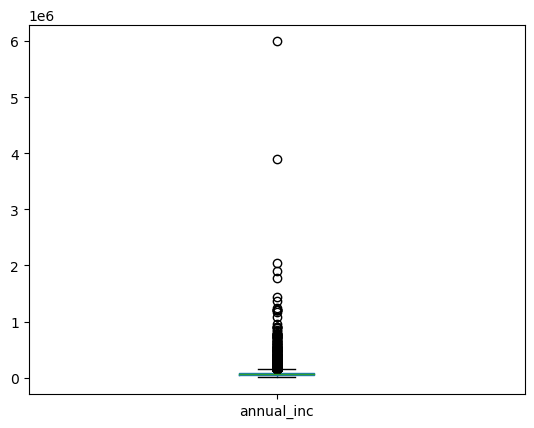

In [16]:
# Box plot of annual income data
box_plot(loan_data, "annual_inc")

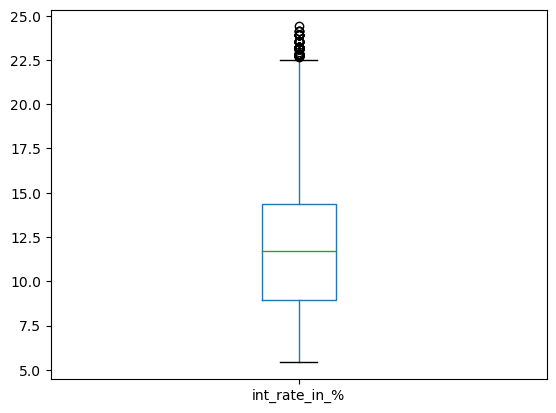

In [17]:
# Box plot of rate of interest 
box_plot(loan_data, "int_rate_in_%")

**Analysis of the above graphs**: The above graphs shows a lot of outliers all the plotted fields. Now we have to perform operations to clean the given data to optimise our analysis.

------------------

## Removing Outiers


In [18]:
# 1st std value of loan_amnt
loan_amnt_upper_limit = loan_data.loan_amnt.mean() + loan_data.loan_amnt.std()
loan_amnt_lower_limit = loan_data.loan_amnt.mean() - loan_data.loan_amnt.std()

print(loan_amnt_upper_limit, loan_amnt_lower_limit)

18395.467075972356 3698.5837833479645


In [19]:
# 1st std value of funded_amnt
fund_amnt_upper_limit = loan_data.funded_amnt.mean() + loan_data.funded_amnt.std()
fund_amnt_lower_limit = loan_data.funded_amnt.mean() - loan_data.funded_amnt.std()

print(fund_amnt_upper_limit, fund_amnt_lower_limit)

17874.364533223015 3693.752479504774


In [20]:
# 1st std value of funded_amnt_inv
funded_amnt_inv_upper_limit = loan_data.funded_amnt_inv.mean() + loan_data.funded_amnt_inv.std()
funded_amnt_inv_lower_limit = loan_data.funded_amnt_inv.mean() - loan_data.funded_amnt_inv.std()

print(fund_amnt_upper_limit, fund_amnt_lower_limit)

17874.364533223015 3693.752479504774


In [21]:
# 1st std value of annual_inc
annual_inc_upper_limit = loan_data.annual_inc.mean() + loan_data.annual_inc.std()
annual_inc_lower_limit = loan_data.annual_inc.mean() - loan_data.annual_inc.std()

print(annual_inc_upper_limit, annual_inc_lower_limit)

132996.65548286051 4559.291879557502


In [22]:
# 2st std value of int_rate
int_rate_upper_limit = loan_data["int_rate_in_%"].mean() + (loan_data["int_rate_in_%"].std() * 2)
int_rate_lower_limit = loan_data["int_rate_in_%"].mean() - (loan_data["int_rate_in_%"].std() * 2)

print(int_rate_upper_limit, int_rate_lower_limit)

19.314873529796216 4.549563829251922


In [23]:
no_outlier = loan_data[(loan_data.loan_amnt < loan_amnt_upper_limit) & (loan_data.loan_amnt > loan_amnt_lower_limit) & (loan_data.annual_inc < annual_inc_upper_limit) & (loan_data.annual_inc > annual_inc_lower_limit) & (loan_data.funded_amnt_inv < funded_amnt_inv_upper_limit) & (loan_data.funded_amnt_inv > funded_amnt_inv_lower_limit) & (loan_data.funded_amnt < fund_amnt_upper_limit) & (loan_data.funded_amnt > fund_amnt_lower_limit) & (loan_data["int_rate_in_%"] < int_rate_upper_limit) & (loan_data["int_rate_in_%"] > int_rate_lower_limit)]
no_outlier.shape

(24400, 18)

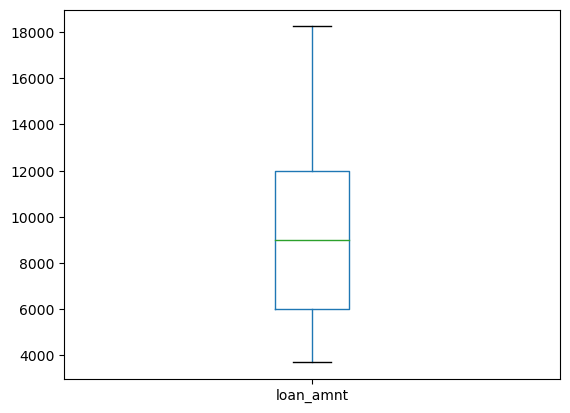

In [24]:
# plotting loan amount values with no outliers
box_plot(no_outlier, "loan_amnt")

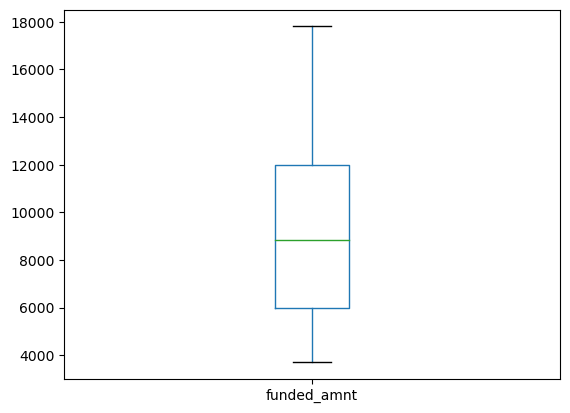

In [25]:
# plotting funded amount values with no outliers
box_plot(no_outlier, "funded_amnt")

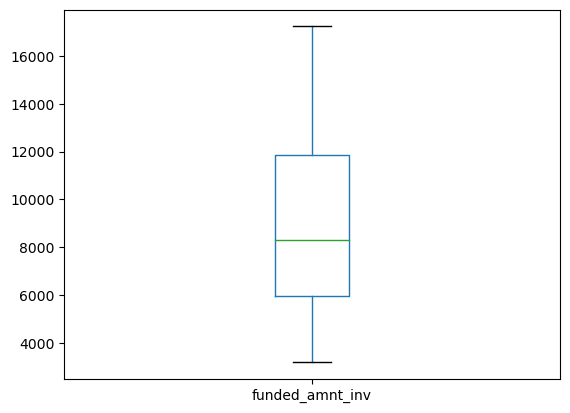

In [26]:
# plotting funded amount by investors values with no outliers
box_plot(no_outlier, "funded_amnt_inv")

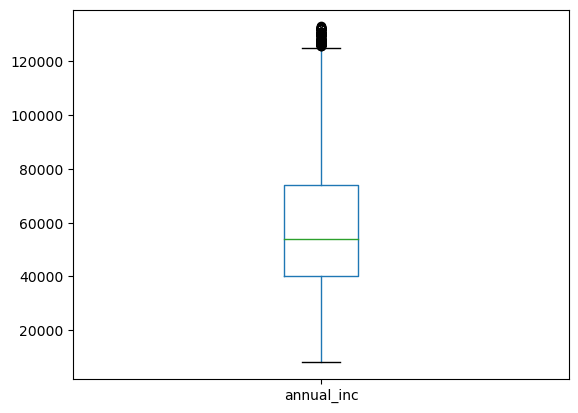

In [27]:
# plotting annual income values with fewer outliers
box_plot(no_outlier, "annual_inc")

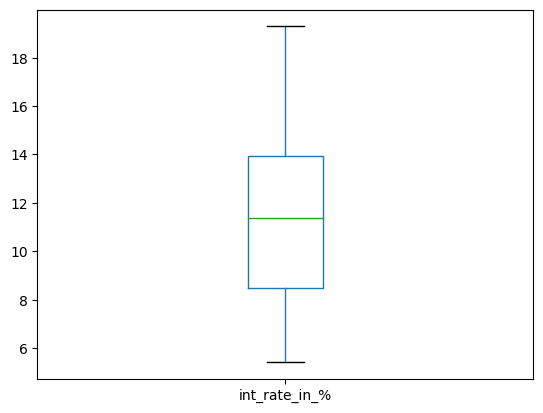

In [28]:
# plotting interest rate values with no outliers
box_plot(no_outlier, "int_rate_in_%")

`We have reduced the outliers in all the above fields considered.`<br>
<br>

This is the basis or asumsions considered to remove the outliers:
1. **Removing outliers with 1st standart deviation as we are performing them on financial data**
2. **Removing outiers with 2nd standard deviasion with respect to Rate of interest**

---------------------------------

# Analysis on the data <br>
## Univariant analysis
**Unordered Data**

In [29]:
no_outlier.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_in_%,installment,emp_length,annual_inc,dti,issue_month
count,"24,400.00","24,400.00","24,400.00","24,400.00","24,400.00","23,741.00","24,400.00","24,400.00","24,400.00"
mean,"9,267.82","9,161.55","8,895.81",11.39,279.28,4.99,"58,475.24",13.39,7.05
std,"3,684.96","3,605.32","3,558.47",3.40,113.60,3.57,"25,298.10",6.65,3.43
min,"3,700.00","3,700.00","3,200.00",5.42,76.44,0.50,"8,000.00",0.00,1.00
25%,"6,000.00","6,000.00","5,975.00",8.49,185.64,2.00,"39,996.00",8.32,4.00
50%,"9,000.00","8,850.00","8,300.00",11.36,262.43,4.00,"54,000.00",13.41,7.00
75%,"12,000.00","12,000.00","11,849.57",13.92,352.25,8.00,"74,000.00",18.63,10.00
max,"18,250.00","17,800.00","17,225.00",19.29,632.06,10.50,"132,996.00",29.99,12.00


In [30]:
no_outlier.nunique()

loan_amnt               499
funded_amnt             514
funded_amnt_inv        4331
term_in_months            2
int_rate_in_%           257
installment            8677
grade                     7
sub_grade                33
emp_length               11
home_ownership            4
annual_inc             3399
verification_status       3
loan_status               2
dti                    2773
purpose                  14
issue_d                  48
issue_month              12
issue_year                5
dtype: int64

In [33]:
# Analysis based on loan status variable
sns.countplot(x=no_outlier.loan_status)

<Axes: xlabel='loan_status', ylabel='count'>

In [32]:
no_outlier.loan_status.value_counts()

Fully Paid     21212
Charged Off     3188
Name: loan_status, dtype: int64

**Analysis of Loan status**: Over 21212 people have paid the loan, while 3188 people have charged off.

-------------------------

In [36]:
# Analysis based on varification status variable
sns.countplot(x=no_outlier.verification_status)

<Axes: xlabel='verification_status', ylabel='count'>

In [37]:
no_outlier.verification_status.value_counts()

Not Verified       11739
Source Verified     6733
Verified            5928
Name: verification_status, dtype: int64

**Analysis of verification status**: Over 11739 people are not verified, 6733 people are Source Verified, while 5928 are Verified. This states that the loan is given out easily without performing any verification

-----------------------

In [38]:
# Analysis based on home ownership status 
sns.countplot(x=no_outlier.home_ownership)

<Axes: xlabel='home_ownership', ylabel='count'>

In [39]:
no_outlier.home_ownership.value_counts()

RENT        12243
MORTGAGE    10185
OWN          1910
OTHER          62
Name: home_ownership, dtype: int64

**Analysis of home ownership data**: Most people who take loans have a mortgage on their house or live in a rental house

-------------------

**Ordered data**

In [40]:
# Analysis based on loan term count
sns.countplot(x=no_outlier.term_in_months)

<Axes: xlabel='term_in_months', ylabel='count'>

In [41]:
no_outlier.term_in_months.value_counts()

 36    19346
 60     5054
Name: term_in_months, dtype: int64

**Analysis of Term data**: Over 19346 people take loans for 36 months, while 5054 people take loans for 60 months 

----------------------

In [42]:
# Analysis based on grade
sns.countplot(x=no_outlier.grade)

<Axes: xlabel='grade', ylabel='count'>

In [43]:
no_outlier.grade.value_counts()

B    7511
A    7399
C    4852
D    3179
E    1240
F     215
G       4
Name: grade, dtype: int64

**Analysis of grade data**: 7399 people have grade A and 7511 people have grade B have the most poeple. 4852 people have grade C with the 3rd highest value

---------------------

<Axes: xlabel='count', ylabel='purpose'>

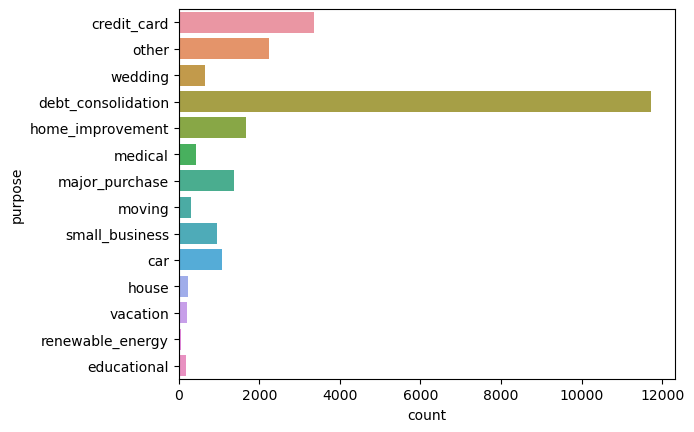

In [407]:
# Analysis based on purpose of taking loan
sns.countplot(y=no_outlier.purpose)

**Analysis on pursose of loan**: Maximum poeple have taken loan for debt consolidation.

------------------------------

<Axes: xlabel='count', ylabel='sub_grade'>

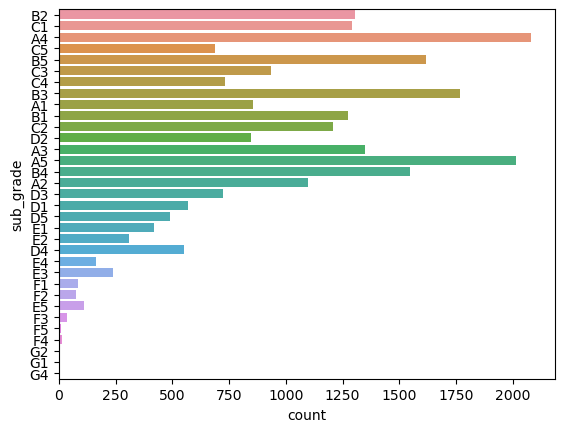

In [415]:
# Analysis based on Sub-grade
sns.countplot(y=no_outlier.sub_grade)

**Analysis on sub-grades**: A5 and A4 have the highest count while B5, B3 and B4 with close values

-------------------

<Axes: xlabel='loan_amnt', ylabel='Count'>

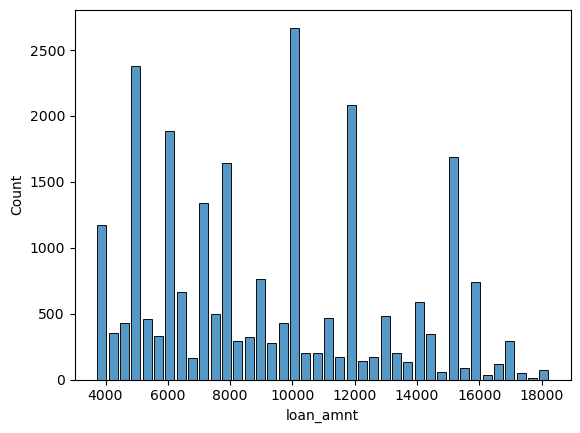

In [408]:
# histogram of loan amount
sns.histplot(data=no_outlier.loan_amnt, bins=40, shrink=.8)

**Analysis on loan amount**: 10,000 is the highest requested loan amount, 5000 is the 2nd highest requested loan amount

----------------------------------------

<Axes: xlabel='funded_amnt', ylabel='Count'>

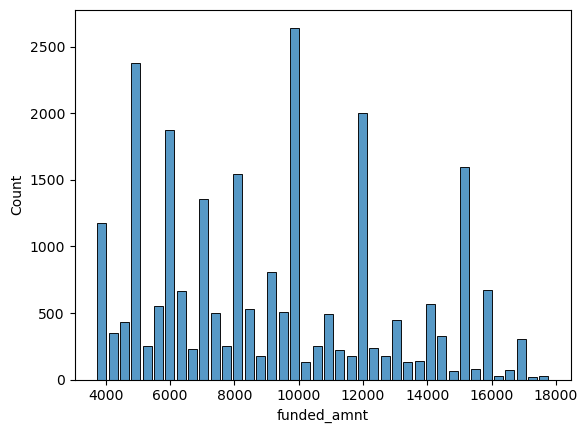

In [409]:
# histogram of funded amount
sns.histplot(data=no_outlier.funded_amnt, bins=40, shrink=.8)

**Analysis on funded amount**: 10,000 is the highest funded loan amount, 5000 is the 2nd highest funded loan amount

-------------------------

<Axes: xlabel='funded_amnt_inv', ylabel='Count'>

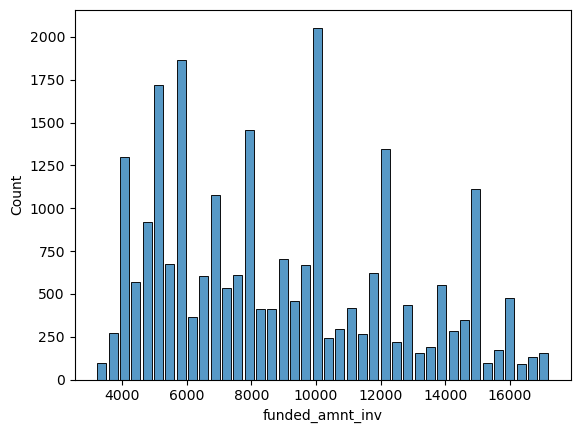

In [410]:
# histogram of funded amount by investor
sns.histplot(data=no_outlier.funded_amnt_inv, bins=40, shrink=.8)

**Analysis on funded amount by investor**: 10,000 is the highest funded loan amount by investor, 6000(aprox) is the 2nd highest funded loan amount by investor

---------------

<Axes: xlabel='int_rate_in_%', ylabel='Count'>

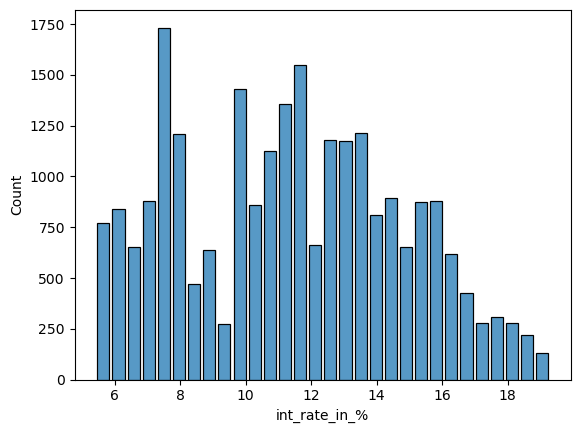

In [411]:
# histogram of rate of interest offered
sns.histplot(data=no_outlier["int_rate_in_%"], bins=30, shrink=.8)

**Analysis on interest rate**: Most of the loan applicants fall between the 10 -16 % interest rate

------------------------

<Axes: xlabel='emp_length', ylabel='Count'>

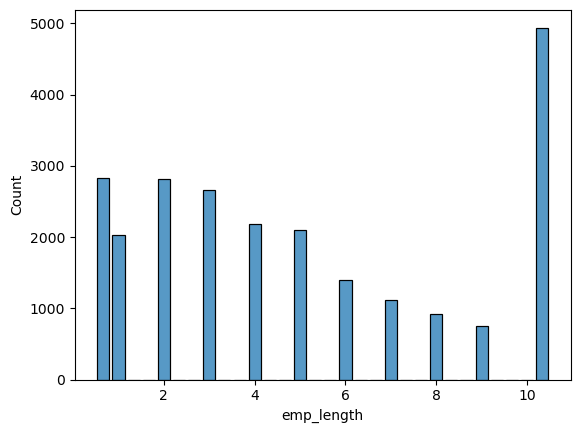

In [412]:
# histogram of employment length
sns.histplot(data=no_outlier.emp_length, bins=30, shrink=.8)

**Analysis on employment length**: Most of the applicants have 10+ years of experience

----------------------------------

<Axes: xlabel='annual_inc', ylabel='Count'>

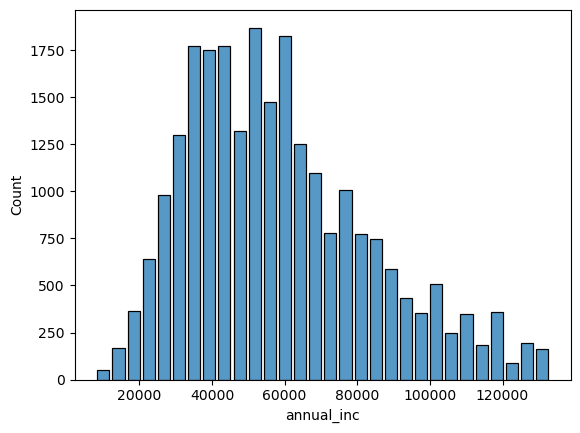

In [413]:
# histogram of annual income
sns.histplot(data=no_outlier.annual_inc, bins=30, shrink=.8)

**Analysis on annual income**: Most of the applicants fall between 25,000 - 60,000 annual income

--------------------

## Bivariant analysis

### Bivariate analysis on un-ordered Variables 

<Axes: xlabel='count', ylabel='purpose'>

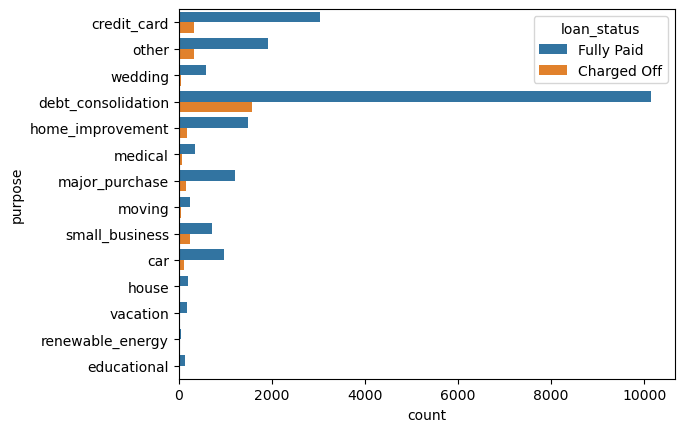

In [435]:
# Analysis between purpose of loan and loan status
sns.countplot(data=no_outlier, y="purpose", hue="loan_status")

**Analysis of the above graph**: The graph clearly states that most of the charged off loan applicants have taken the loan as a debt consolidation. But if we check the ratio we can see that people who have taken a loan for a small buisness are more likely to have charged off

------------------

<Axes: xlabel='home_ownership', ylabel='count'>

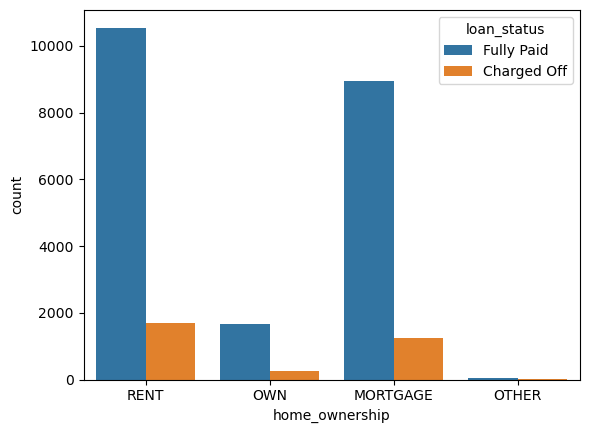

In [436]:
# Analysis between home owners and loan status
sns.countplot(data=no_outlier, x="home_ownership", hue="loan_status")

**Analysis of the above graph**: We can see from the above graph that people in a mortgaged house, rental or other are more likely to have charged off the loan.

-----------------------

<Axes: xlabel='verification_status', ylabel='count'>

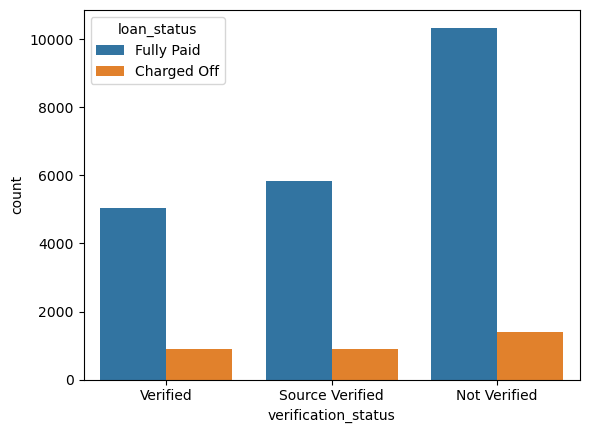

In [439]:
# Analysis between varification of application and loan status
sns.countplot(data=no_outlier, x="verification_status", hue="loan_status")

**Analysis on the above graph**: Although in count loan applicants who are not carified have charged off the loan the most, the persentage of loan defaulters looks to be higher in verified and Source verified.

---------------

### Bivariate analysis on ordered Variables 

<Axes: xlabel='grade', ylabel='count'>

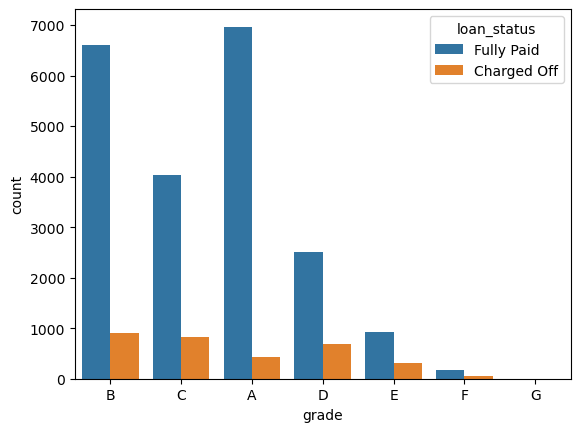

In [437]:
# Analysis between grade and loan status
sns.countplot(data=no_outlier, x="grade", hue="loan_status")

**Analysis on the above graph**: In this we can see that people with grade B, C and D have the highest charged off loan applicant count.

--------------------

<Axes: xlabel='term_in_months', ylabel='count'>

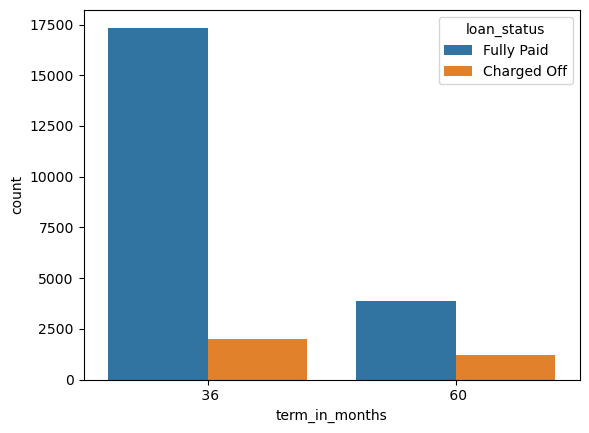

In [438]:
# Analysis between term of loan and loan status
sns.countplot(data=no_outlier, x="term_in_months", hue="loan_status")

**Analysis o fthe above graph**: In the above graph we can see that the people with 36 months term have charged off more. But when you look at the graph, the percentage of people who have taken loan on a 60 months are more likely to have charged off

------------------

<Axes: xlabel='count', ylabel='sub_grade'>

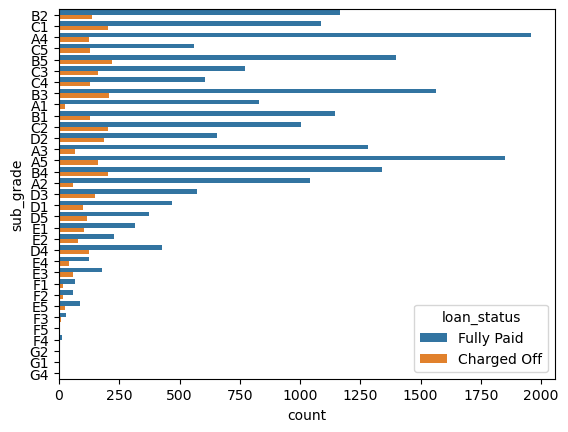

In [441]:
# Analysis between sub-grade of applicent and loan status
sns.countplot(data=no_outlier, y="sub_grade", hue="loan_status")

**Analysis on the above graph**: Loan applicants in C1, B5, B3, C2 and B4 seam to have a high loan default count

-------------------

### Bivariate analysis on Quantitative Variables 

<Axes: xlabel='annual_inc', ylabel='Count'>

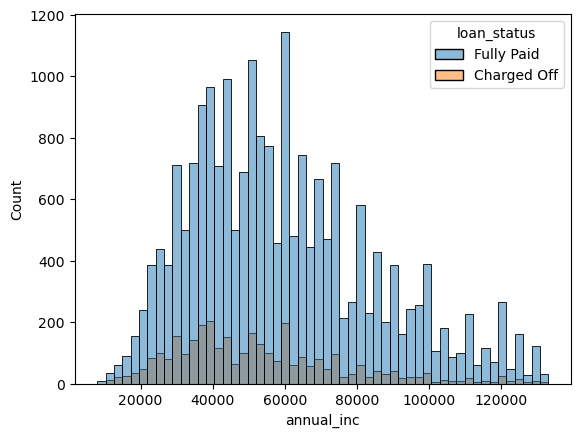

In [433]:
# analysis annual income and loan status
sns.histplot(data=no_outlier, x="annual_inc", hue="loan_status")

**Analysis on the above graph**: People who have income close to 40,000 and around and 60,000 have a high charged off count. But we can also say that poeple who have income around 60,000 who have fully paid the loan is the highest

-----------------------

<Axes: xlabel='loan_amnt', ylabel='Count'>

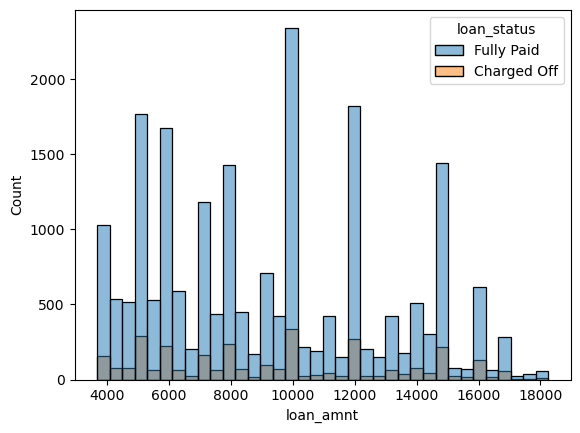

In [480]:
# analysis loan amount and loan status
sns.histplot(data=no_outlier, x="loan_amnt", hue="loan_status")

**Analysis on the above graph**: people with loan amount who are closer to a rounded off value like 10000, 12000, 4000, 5000 have a higher Charged off count

-----------------

<Axes: xlabel='emp_length', ylabel='Count'>

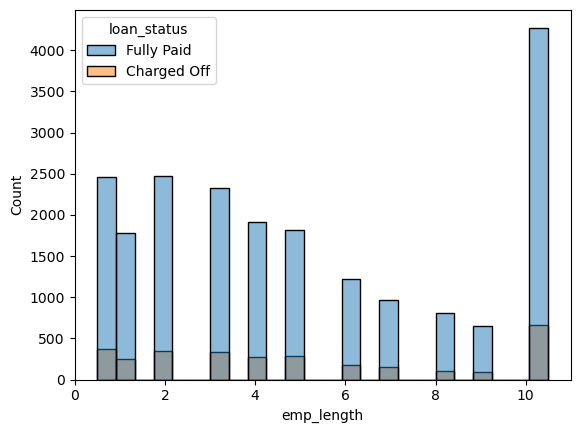

In [457]:
# analysis employment length and loan status
sns.histplot(data=no_outlier, x="emp_length", hue="loan_status")

**Analysis on the above graph**: people with employment length of over 10 years have the highest charged off count

-----------------------

<Axes: xlabel='int_rate_in_%', ylabel='Count'>

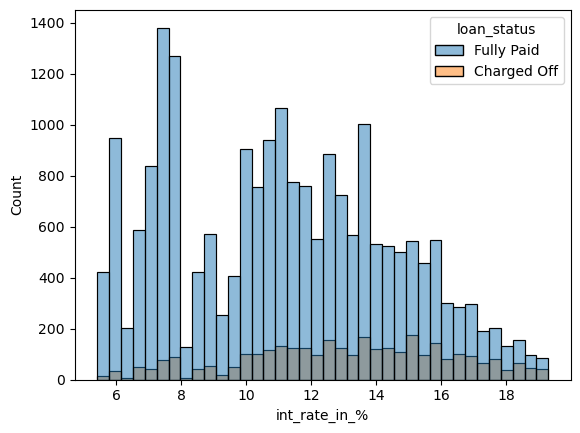

In [458]:
# analysis rate of interest and loan status
sns.histplot(data=no_outlier, x="int_rate_in_%", hue="loan_status")

**Analysis of the above graph**: This graph saya that the higher the rate of interst the more likely for the loan to be charged off

------------------

<Axes: xlabel='funded_amnt_inv', ylabel='Count'>

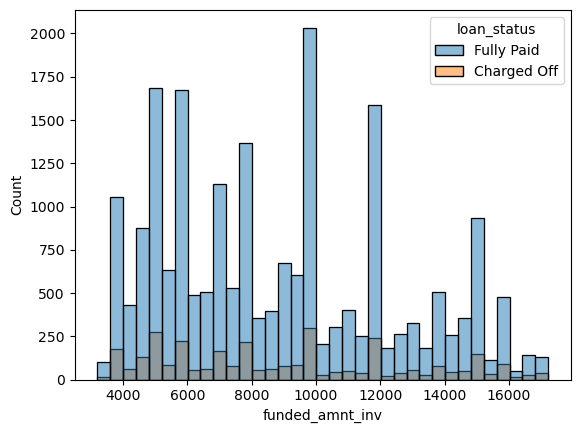

In [459]:
# analysis funded amount by investor and loan status
sns.histplot(data=no_outlier, x="funded_amnt_inv", hue="loan_status")

**Analysis on the above graph**: people with funded investor amount who are closer to a rounded off value like 10000, 12000, 4000, 5000 have a higher Charged off count

-------------------

<Axes: xlabel='funded_amnt', ylabel='Count'>

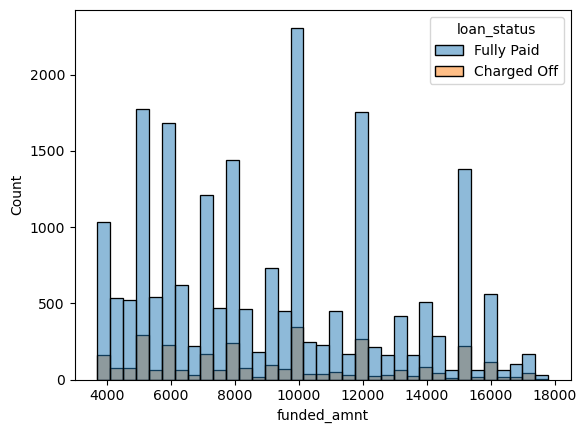

In [460]:
# analysis funded amount after aprovel and loan status
sns.histplot(data=no_outlier, x="funded_amnt", hue="loan_status")

**Analysis on the above graph**: people with funded amount who are closer to a rounded off value like 10000, 12000, 4000, 5000 have a higher Charged off count

---------------

<Axes: xlabel='funded_amnt_inv', ylabel='Count'>

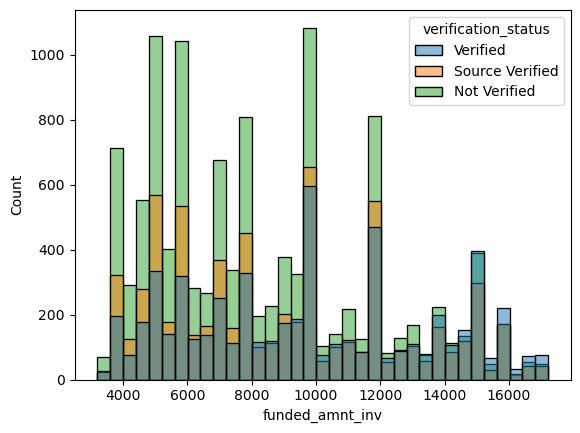

In [483]:
# analysis on funded amount and verification status
sns.histplot(data=no_outlier, x="funded_amnt_inv", hue="verification_status")

**Analysis on the above graph**: Funds bellow 12000 granted easily without any verification or just source verification

-------------

<Axes: xlabel='int_rate_in_%', ylabel='Count'>

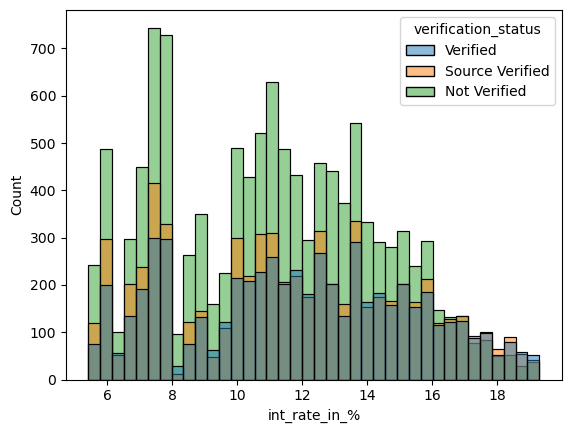

In [485]:
# analysis on interest rate and verification status
sns.histplot(data=no_outlier, x="int_rate_in_%", hue="verification_status")

**Analysis on the above graph**: Interest rates are higher for verified users.

-----------------

<Axes: xlabel='loan_amnt', ylabel='Count'>

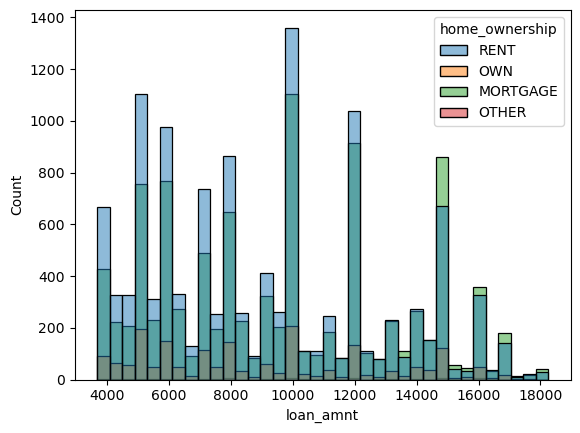

In [487]:
# analysis on funded amount and home ownwership status
sns.histplot(data=no_outlier, x="loan_amnt", hue="home_ownership")

**Analysis on the above data**: The count of applicants with loan amount requested by home owners is mostly lesser than 12000. While count of people with mortgage homes is higher after 12000.

-------------------

<Axes: xlabel='int_rate_in_%', ylabel='Count'>

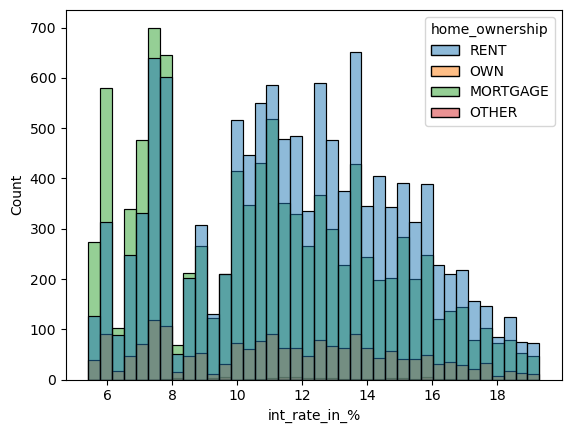

In [488]:
# analysis on funded amount and home ownwership status
sns.histplot(data=no_outlier, x="int_rate_in_%", hue="home_ownership")

**Analysis of the above chart**: Loan applicants with rental property mostly fall between 10% to 19.29%. Interest rate between 5% to 8% have a high count of people who live in a mortgaged home. 

--------------------------